# WeatherPy
#### Important: please pay attention to the NOTE: added in the comments in IN[8]

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import urllib
import json
from scipy.stats import linregress

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Import API key
from api_keys import weather_api_key

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Output File (CSV)
output_data_file = "output_data/cities.csv"

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count
len(cities)

574

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Starting URL for Weather Map API call
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"
# Print (url)


# List of City Data
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print ("-" * 15)


# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in list
for index, city in enumerate(cities):
    # Group cities in sets of 50 for loggin purpose
    if (index % 50 == 0 and index >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    
    # Log the URL and set number
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        
        # Extract out max temp humidity and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the city info into the city data list
        city_data.append({
            "City" :city,
            "Lat" :city_lat,
            "Lng" :city_lng,
            "Max Temp" :city_max_temp,
            "Humidity" :city_humidity,
            "Cloudiness" :city_clouds,
            "Windspeed" :city_wind,
            "Country" :city_country,
            "Date" :city_date  
        })
    except:
        print("City not found. Skipping ...")
        pass
    # Indicate that data loading is complete
        print("-----------------------")
        print("Data Retrieval Complete")
        print("-----------------------")
        
        
        
        

Beginning Data Retrieval
---------------
Processing Record 1 of Set 1 | isafjordur
Processing Record 2 of Set 1 | traverse city
Processing Record 3 of Set 1 | west island
Processing Record 4 of Set 1 | kinkala
Processing Record 5 of Set 1 | westport
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | port mathurin
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | portrush
Processing Record 11 of Set 1 | olonkinbyen
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | oranjestad
Processing Record 15 of Set 1 | st. john's
Processing Record 16 of Set 1 | keflavik
Processing Record 17 of Set 1 | hawaiian paradise park
Processing Record 18 of Set 1 | hobyo
Processing Record 19 of Set 1 | laascaanood
Processing Record 20 of Set 1 | igarka
Processing Record 21 of Set 1 | port-aux-francais
Processing Record 22 of Set 1 | 

Processing Record 28 of Set 4 | guadix
Processing Record 29 of Set 4 | markaz-e hukumat-e darweshan
Processing Record 30 of Set 4 | nikolayevsk-on-amure
Processing Record 31 of Set 4 | ust-nera
Processing Record 32 of Set 4 | as sulayyil
Processing Record 33 of Set 4 | robore
Processing Record 34 of Set 4 | vilyuysk
Processing Record 35 of Set 4 | athens
Processing Record 36 of Set 4 | shizuishan
Processing Record 37 of Set 4 | constantia
Processing Record 38 of Set 4 | port douglas
Processing Record 39 of Set 4 | prainha
Processing Record 40 of Set 4 | kidal
Processing Record 41 of Set 4 | tuba city
Processing Record 42 of Set 4 | tinajo
Processing Record 43 of Set 4 | aktau
Processing Record 44 of Set 4 | cabedelo
Processing Record 45 of Set 4 | cockburn town
Processing Record 46 of Set 4 | tiznit
Processing Record 47 of Set 4 | bardai
Processing Record 48 of Set 4 | san antonio de pale
Processing Record 49 of Set 4 | mazowe
Processing Record 0 of Set 5 | smithers
Processing Record 1

Processing Record 10 of Set 8 | pandan
Processing Record 11 of Set 8 | katsuura
Processing Record 12 of Set 8 | parabel'
Processing Record 13 of Set 8 | waitara
Processing Record 14 of Set 8 | palikir - national government center
Processing Record 15 of Set 8 | tralee
Processing Record 16 of Set 8 | ban nong wua so
Processing Record 17 of Set 8 | azna
Processing Record 18 of Set 8 | tamanrasset
Processing Record 19 of Set 8 | nova sintra
Processing Record 20 of Set 8 | chonchi
Processing Record 21 of Set 8 | xining
Processing Record 22 of Set 8 | siwa oasis
Processing Record 23 of Set 8 | severo-yeniseyskiy
Processing Record 24 of Set 8 | gering
Processing Record 25 of Set 8 | fale old settlement
Processing Record 26 of Set 8 | port lincoln
Processing Record 27 of Set 8 | newman
Processing Record 28 of Set 8 | dakhla
Processing Record 29 of Set 8 | howrah
Processing Record 30 of Set 8 | junin
Processing Record 31 of Set 8 | yigo village
Processing Record 32 of Set 8 | pennsville
Proces

Processing Record 36 of Set 11 | sisimiut
Processing Record 37 of Set 11 | sao bento do sul
Processing Record 38 of Set 11 | roanoke rapids
Processing Record 39 of Set 11 | limassol
Processing Record 40 of Set 11 | jayapura
Processing Record 41 of Set 11 | smithville
Processing Record 42 of Set 11 | ierapetra
Processing Record 43 of Set 11 | vorkuta
Processing Record 44 of Set 11 | saldanha
Processing Record 45 of Set 11 | atherton
Processing Record 46 of Set 11 | santo antonio do ica
Processing Record 47 of Set 11 | minas de marcona
Processing Record 48 of Set 11 | khrystynivka
Processing Record 49 of Set 11 | kemise
Processing Record 0 of Set 12 | san jacinto amilpas
Processing Record 1 of Set 12 | wuhai
Processing Record 2 of Set 12 | primero de mayo
Processing Record 3 of Set 12 | baruun-urt
Processing Record 4 of Set 12 | severobaykal'sk
Processing Record 5 of Set 12 | okeho
Processing Record 6 of Set 12 | tazacorte
Processing Record 7 of Set 12 | nishinoomote
Processing Record 8 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#NOTE: Wait 2-3 mins for the previous API call to process completely before running this frame
#      this will ensure the output.
# Convert array of JSON into Pandas
city_data_df = pd.DataFrame(city_data)


# Extract relevant fields from the data frame
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Windspeed"]

city_data_df.to_csv(output_data_file, index_label="City_ID")

city_data_df.count()



City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Windspeed     552
Country       552
Date          552
dtype: int64

In [5]:
# Display the city Data Frame
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,isafjordur,66.0755,-23.1240,33.01,77,80,5.28,IS,1682987513
1,traverse city,44.7631,-85.6206,35.67,95,100,16.11,US,1682987467
2,west island,-12.1568,96.8225,80.58,83,40,16.11,CC,1682987513
3,kinkala,-4.3614,14.7644,71.96,88,100,1.57,CG,1682987513
4,westport,41.1415,-73.3579,56.21,73,100,10.36,US,1682987257


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

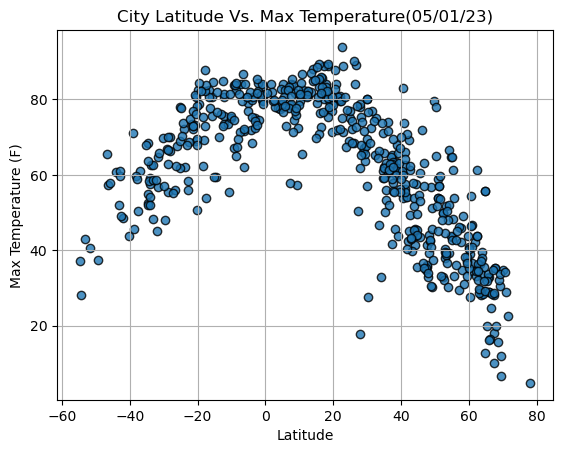

In [23]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
            max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("output_data/Lat_vs_MaxTemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

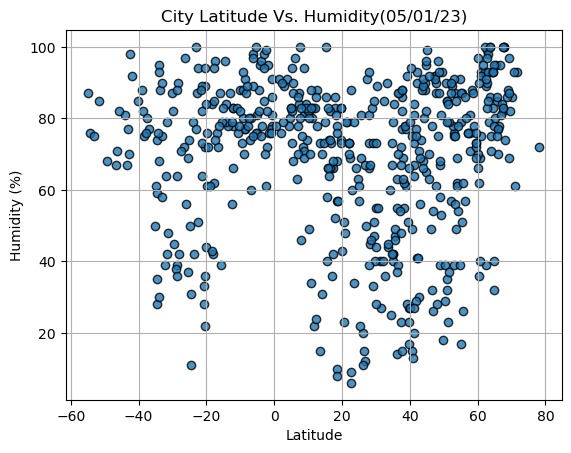

In [24]:
# Build scatter plot for latitude vs. Humidity
plt.scatter(lats,
            humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save figure
plt.savefig("output_data/Lat_vs_Humid.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

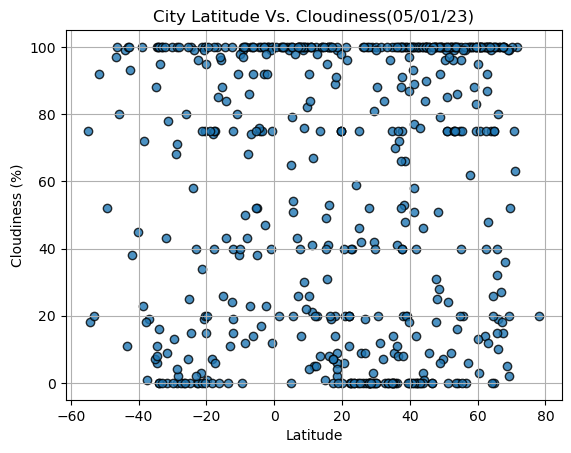

In [25]:
# Build scatter plot for latitude vs. Cloudiness
plt.scatter(lats,
            cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save figure
plt.savefig("output_data/Lat_vs_Cloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

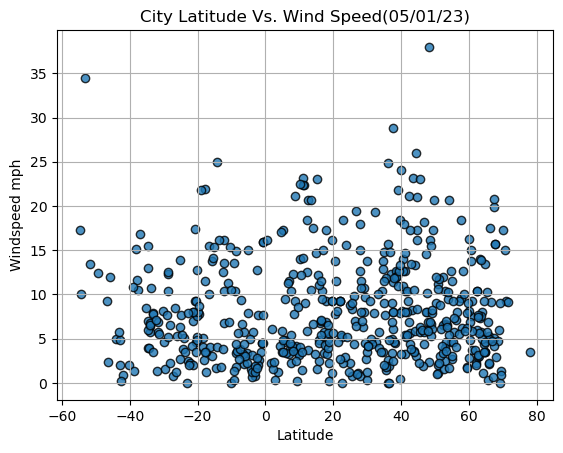

In [26]:
# Build scatter plot for latitude vs. Windspeed
plt.scatter(lats,
            wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Windspeed mph")
plt.xlabel("Latitude")
plt.grid(True)


# Save figure
plt.savefig("output_data/Lat_vs_Wind.png")

# Show plot
plt.show()

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [14]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression


According to Pearson correlation coefficient table.
The regression displays a strong negative correlation.
In the nothern hemisphere, as you increase latitude from the equator the temperature decreases. The variables goes in opposite direction.

The r-squared is: -0.8667665926123904


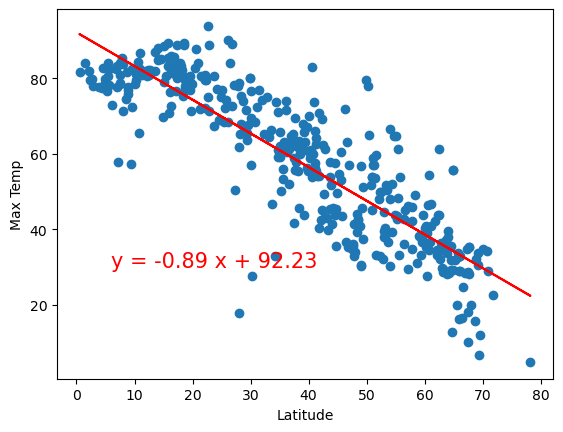

In [15]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The regression displays a strong positive correlation. In the southern hemisphere, as you increase latitude to the equator the temperature increases. The variables go in the same direction.

The r-squared is: 0.7678451792859123


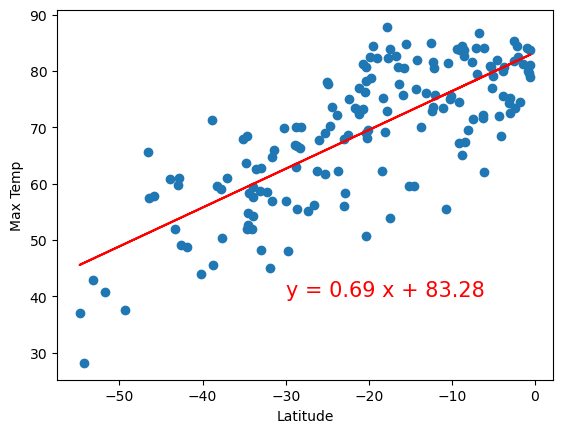

In [16]:
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
The regression displays no correlation between humidity and latitude, because there are more outliers away from the regression line, than there are close to it.

The r-squared is: 0.13502060630674934


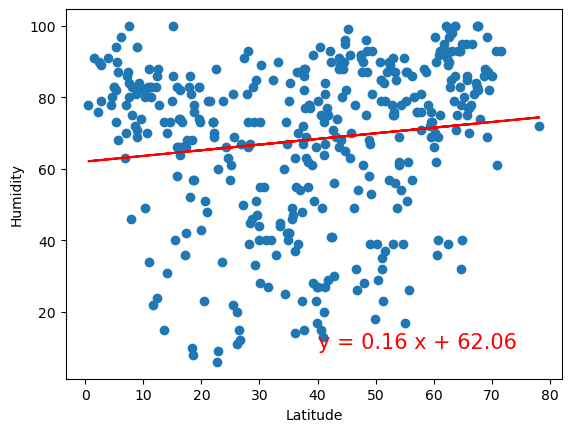

In [17]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
The regression displays no correlation between humidity and latitude, because there are more outliers away from the regression line, than there are close to it.

The r-squared is: 0.22604453289174467


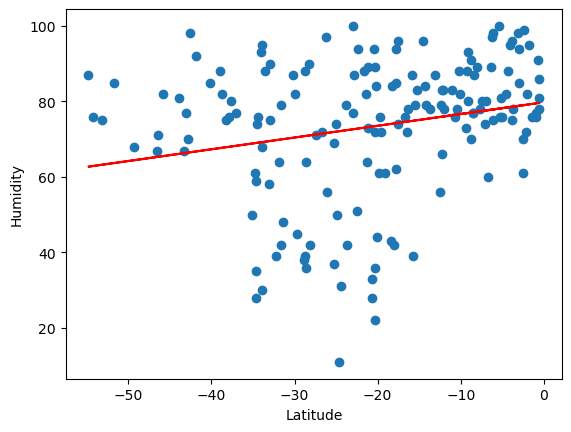

In [18]:
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
The regression displays no correlation between the data sets, due to the majority of outliers present.

The r-squared is: 0.11884057050391952


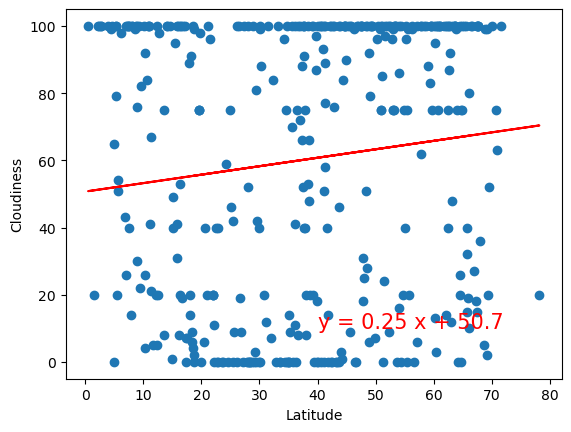

In [19]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
The regression does not display much of a correlation between the data sets, too many outliers present.

The r-squared is: 0.17095561593175143


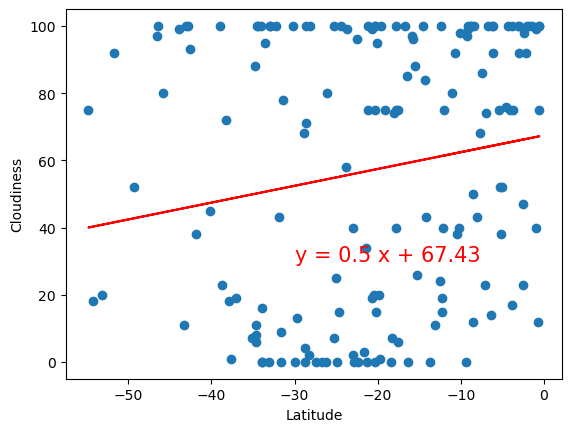

In [20]:
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
The regression shows a weak negative correlation, the windspeed remains constant as latitud increases. With occausional windspeed increases shown by the outliers. The regression does not display much of a correlation between the data sets.

The r-squared is: -0.02335748690599882


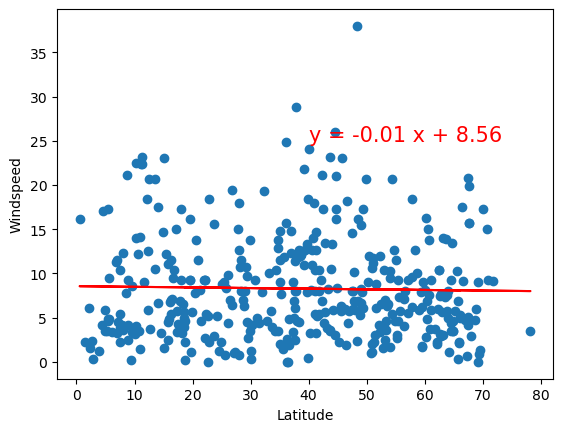

In [21]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Windspeed"]
plot_linear_regression(x_values,y_values, 'Windspeed', (40,25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
The regression shows a weak negative correlation, the windspeed remains constant as latitud increases. The regression does not display much of a correlation between the data sets.

The r-squared is: -0.18088309730042404


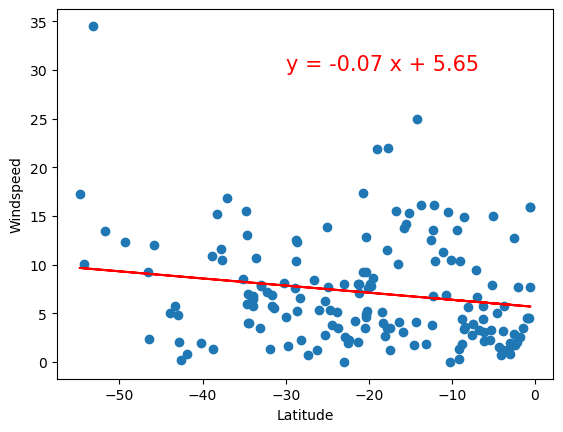

In [22]:
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Windspeed"]
plot_linear_regression(x_values,y_values, 'Windspeed', (-30,30))